# NLP on social media data (Part II) : Analysing Data For a Subreddit

## Load data

First, we load our data from our SQLite database we saved last week.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
con = sqlite3.connect('so_reddit.sqlite')
df = pd.read_sql_query('SELECT * from posts;', con)
con.close()
df

,title,link,author,n_comments,score,text,comments
0,1 out of 5 young people 18-29 now say that the...,/r/sociology/comments/18e3ai0/1_out_of_5_young...,InfluenceLevel1629,419,1225,,Note the 65+ age group value.\n\nViewed sociol...
1,Is there a paedophilia-panic going on in the US?,/r/sociology/comments/17nowa7/is_there_a_paedo...,pixelhippie,478,1149,Sorry for the bold and somewhat exaggerated cl...,"Honestly, you may be right. I have certainly s..."
2,Burned Out?,/r/sociology/comments/18btdj0/burned_out/,Past_Potential902,185,774,I saw this interesting tweet from a Professor....,I feel like none of us have really recovered f...
3,Are memes ok? (Goffman inspired meme),/r/sociology/comments/q3p5wh/are_memes_ok_goff...,swerc137,19,764,,Surprise parties. This is what killed my perso...
4,For the sociologist who love The Office as muc...,/r/sociology/comments/ktalnx/for_the_sociologi...,frenchkafka,15,630,,My students read part of *Suicide* for their S...
...,...,...,...,...,...,...,...
995,"Big sociological theorists in their ""prime"" ri...",/r/sociology/comments/or3zqy/big_sociological_...,leftzoloft,36,36,It feels like sociology is losing its big theo...,It’s less about sociology losing its big theor...
996,Why wasn't race created earlier?,/r/sociology/comments/ly2nl3/why_wasnt_race_cr...,leftzoloft,17,36,A lot of sociologists argue (and I agree) that...,Race and racism can't really come to fruition ...
997,Has there been research done on how to reduce ...,/r/sociology/comments/jxydre/has_there_been_re...,Slashtap,13,35,I was talking to a friend in the military this...,Having racial bias (with varying degrees of in...
998,"What are large, free database sets that you wi...",/r/sociology/comments/iux2su/what_are_large_fr...,ViolaInternational,6,39,,World values survey and European Social Survey...


In [5]:
df['combined'] = df['title'] + ' ' + df['text']
df

,title,link,author,n_comments,score,text,comments,combined
0,1 out of 5 young people 18-29 now say that the...,/r/sociology/comments/18e3ai0/1_out_of_5_young...,InfluenceLevel1629,419,1225,,Note the 65+ age group value.\n\nViewed sociol...,1 out of 5 young people 18-29 now say that the...
1,Is there a paedophilia-panic going on in the US?,/r/sociology/comments/17nowa7/is_there_a_paedo...,pixelhippie,478,1149,Sorry for the bold and somewhat exaggerated cl...,"Honestly, you may be right. I have certainly s...",Is there a paedophilia-panic going on in the U...
2,Burned Out?,/r/sociology/comments/18btdj0/burned_out/,Past_Potential902,185,774,I saw this interesting tweet from a Professor....,I feel like none of us have really recovered f...,Burned Out? I saw this interesting tweet from ...
3,Are memes ok? (Goffman inspired meme),/r/sociology/comments/q3p5wh/are_memes_ok_goff...,swerc137,19,764,,Surprise parties. This is what killed my perso...,Are memes ok? (Goffman inspired meme)
4,For the sociologist who love The Office as muc...,/r/sociology/comments/ktalnx/for_the_sociologi...,frenchkafka,15,630,,My students read part of *Suicide* for their S...,For the sociologist who love The Office as muc...
...,...,...,...,...,...,...,...,...
995,"Big sociological theorists in their ""prime"" ri...",/r/sociology/comments/or3zqy/big_sociological_...,leftzoloft,36,36,It feels like sociology is losing its big theo...,It’s less about sociology losing its big theor...,"Big sociological theorists in their ""prime"" ri..."
996,Why wasn't race created earlier?,/r/sociology/comments/ly2nl3/why_wasnt_race_cr...,leftzoloft,17,36,A lot of sociologists argue (and I agree) that...,Race and racism can't really come to fruition ...,Why wasn't race created earlier? A lot of soci...
997,Has there been research done on how to reduce ...,/r/sociology/comments/jxydre/has_there_been_re...,Slashtap,13,35,I was talking to a friend in the military this...,Having racial bias (with varying degrees of in...,Has there been research done on how to reduce ...
998,"What are large, free database sets that you wi...",/r/sociology/comments/iux2su/what_are_large_fr...,ViolaInternational,6,39,,World values survey and European Social Survey...,"What are large, free database sets that you wi..."


Since we have both the title and the text from for each post, I could combine them. I will leave the comments separate to avoid diluting the sentiment of the author's opinion.

## Keyword sentiment 

### AFINN

We will start with a keyword sentiment analysis technique. We begin by loading a dictionary of words along with their respective sentiment values, which range from -5 (Most Negative) to 5 (Most Positive).

In [2]:
sentiment_df = pd.read_csv('AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')
sentiment_dict = sentiment_df.to_dict()['score']

Then, we perform the sentiment analysis. We take the scores for each word and takes the average to get the sentiment score for the full post (title+text).

In [ ]:
import numpy as np

title_sentiments = []
for title in df['combined']:
    words = title.lower().split()
    this_titles_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_titles_sentiments.append(sentiment_dict[w])
        else:
            this_titles_sentiments.append(0)
            
    
    title_sentiments.append(np.mean(this_titles_sentiments))

In [11]:
df['keyword_sentiment'] = title_sentiments

<Axes: ylabel='Frequency'>

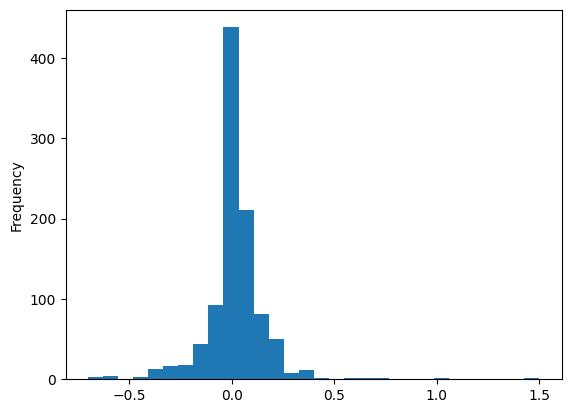

In [12]:
df['keyword_sentiment'].plot.hist(bins=30)

In [13]:
df['keyword_sentiment'].mean()

0.016592978040396465

In [22]:
df['keyword_sentiment'].median()

0.0

In [23]:
df['keyword_sentiment'].std()

0.14453495208830944

We received a mean sentiment score of 0.0166 for the keyword sentiment, indicating that on average the sentiment in the posts is almost neutral, but very slightly positive, which maybe caused by the words in our database not being in the lookup dictionary. The standard deviation is 0.14, indicating that most of the keyword sentiment scores are relatively close to the mean of 0.017. This suggests that while there are some keywords that are significantly positive or negative, they are less common compared to those closer to a neutral sentiment.

We can analyze some of the top and bottom sentiment posts:

In [18]:
df.sort_values(by='keyword_sentiment')[['combined', 'keyword_sentiment']]

,combined,keyword_sentiment
651,Do women slut shame other women as much as men...,-0.700000
538,How faking your feelings at work can be damaging,-0.666667
547,Norway’s controversial experiment – healing pr...,-0.666667
431,Why Sexism and Racism Never Diminish-Even When...,-0.615385
817,Inequality Is Only Getting Worse,-0.600000
...,...,...
277,The 100 Best Sociology Books,0.600000
14,Social disorganization humor,0.666667
688,Good sociology based podcasts?,0.750000
31,Yes,1.000000


In [24]:
df.sort_values(by='keyword_sentiment')['combined'].to_list()[:10]

['Do women slut shame other women as much as men? And why do men and women slut shame other women?',
 'How faking your feelings at work can be damaging ',
 'Norway’s controversial experiment – healing prisoners instead of punishing ',
 'Why Sexism and Racism Never Diminish-Even When Everyone Becomes Less Sexist and Racist ',
 'Inequality Is Only Getting Worse ',
 'How to Destroy ‘Surveillance Capitalism’ ',
 'A cleansing fire: Moral outrage alleviates guilt and buffers threats to one’s moral identity ',
 'The 1% of the population accountable for 63% of all violent crime convictions ',
 'Anthony Giddens "The Suicide Problem in French Sociology" 1965. ',
 'The Shocking Truth of the Notorious Milgram Obedience Experiments ']

Sorting the posts to identify the lowest sentiment scores reveals posts on negative attitudes towards women, poor mental health, sexism, racism, inequality, suicide, and other social issues. These are negative topics, which suggests that the sentiment scores are accurate. However, one of the bottom ten posts addresses the topic of healing prisoners instead of punishing them. While this subject promotes the positive idea of supporting and reintegrating prisoners, it received a negative score due to it having more negative words 'controversial' (score : -2), 'prisoners' (score : -2), and 'punishing' (score : -2), compared to positive ones 'healing' (score : 0).

In [25]:
df.sort_values(by='keyword_sentiment', ascending=False)['combined'].to_list()[:10]

['Pure gold ',
 'Yes ',
 'Good sociology based podcasts? ',
 'Social disorganization humor ',
 'The 100 Best Sociology Books ',
 'Wealth matters when it comes to obesity ',
 'How happiness in marriage changes over time ',
 '70% of rich families lose wealth by second generation, 90% by third ',
 'Stuart Hall, Champion of cultural studies and leading intellectual dies ',
 'Rest In Peace bell hooks ']

Sorting the posts by the highest sentiment scores reveals a mix of positive posts containing words like (gold, yes, and good) and others that aren’t positive, such as two posts about death. This occurred because the sentiment analysis picked up positive words like ‘champion’ (score: 2) and ‘leading’ (score: 2), which outweighed ‘dies’ (score: 0), a word not included in the sentiment library. As a result, these posts were incorrectly classified as positive. In order to fix this, we need a model that can take context into account.

### TextBlob

In [28]:
def get_tb_sentiment(text):
    tb = TextBlob(text)
    return tb.sentiment[0]

df['tb_sentiment'] = df['combined'].apply(get_tb_sentiment)

<Axes: ylabel='Frequency'>

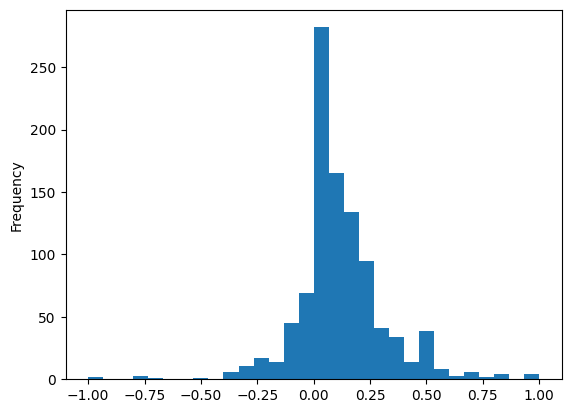

In [29]:
df['tb_sentiment'].plot.hist(bins=30)

We can see that the distribution using TextBlob looks similar but is more spread out than our AFINN method, which maybe because TextBlob has more words in its lookup dictionary than the AFINN dictionary.

In [30]:
df['tb_sentiment'].mean()

0.11010258492311031

In [34]:
df.sort_values(by='tb_sentiment', ascending=False)[['combined', 'tb_sentiment']]

,combined,tb_sentiment
78,What are “must-read” sociology books? Hit me w...,1.00
693,Education is often touted as the 'great equali...,1.00
345,What is the best paper in sociology that you h...,1.00
277,The 100 Best Sociology Books,1.00
639,This is fascinating. No verbal instruction to ...,0.85
...,...,...
312,For when you need to talk with your economist ...,-0.75
269,Tutorial on how to calculate descriptive stati...,-0.75
399,The 1% of the population accountable for 63% o...,-0.80
759,The Shocking Truth of the Notorious Milgram Ob...,-1.00


In [37]:
df.sort_values(by='tb_sentiment', ascending=False)['combined'].to_list()[:10]

['What are “must-read” sociology books? Hit me with your best books.',
 "Education is often touted as the 'great equalizer.' But does it truly mitigate socioeconomic disparities? Share your thoughts! ",
 'What is the best paper in sociology that you have read in 2018 and why? ',
 'The 100 Best Sociology Books ',
 'This is fascinating. No verbal instruction to the audience, yet a perfect conveyance of instruction. ',
 'Trump’s Win Has Ad Agencies Rethink How They Collect Data, Recruit staff: Trump’s win spurs concerns that ad agencies are out of touch with consumers | The Wall Street Journal ',
 'Are sociology memes welcome on this subreddit? Title.',
 'Iran set to elect record number of women into parliament. Eight of the women elected this time were on a reformist-backed list of 30 candidates standing in the Tehran constituency known as “the list of hope”. Among them is Parvaneh Salahshori, a 51-year-old sociologist and university professor. ',
 'The automatic audio transcript for my 

In [38]:
df.sort_values(by='tb_sentiment', ascending=True)['combined'].to_list()[:10]

['There’s an awful cost to getting a PhD that no one talks about ',
 'The Shocking Truth of the Notorious Milgram Obedience Experiments ',
 'The 1% of the population accountable for 63% of all violent crime convictions ',
 'For when you need to talk with your economist friends: [http://www-personal.umich.edu/\\~econjeff/Papers/econ\\_soc\\_phrase\\_original.pdf](http://www-personal.umich.edu/~econjeff/Papers/econ_soc_phrase_original.pdf)',
 "Tutorial on how to calculate descriptive statistics in R Hey, I've created a tutorial on how to calculate descriptive statistics using the summary() function in the R programming language: [https://statisticsglobe.com/summary-function-in-r/](https://statisticsglobe.com/summary-function-in-r/)",
 'Is Fascism Bad? ',
 'Climate change ignored? U-M study reveals sociology’s blind spot ',
 "Breakdown of Jay Z's 99 Problems with the sociology and law behind the verses ",
 "Employed but homeless in the US: The 'working poor' who can't afford to rent ",
 '

# Summary

First, I loaded the data from our SQLite database we saved last week. I combined the title and text columns. I left the comments separate to avoid diluting the sentiment of the author's opinion.

I conducted a keyword sentiment analysis. I loaded a dictionary of words along with their respective sentiment values, which range from -5 (Most Negative) to 5 (Most Positive), then, I took the scores for each word and calculated the average to get the sentiment score for each full post (title+text).

I received a mean sentiment score of 0.0166 for the keyword sentiment, indicating that on average the sentiment in the posts is almost neutral, but very slightly positive, which maybe caused by the words in my database not being in the lookup dictionary. The standard deviation is 0.14, indicating that most of the keyword sentiment scores are relatively close to the mean of 0.017. This suggests that while there are some keywords that are significantly positive or negative, they are less common compared to those closer to a neutral sentiment.

I then analyzed some of the top and bottom sentiment posts:

Sorting the posts by the lowest sentiment scores revealed posts on negative attitudes towards women, poor mental health, sexism, racism, inequality, suicide, and other social issues. These are negative topics, which suggests that the sentiment scores are accurate. However, one of the bottom ten posts addresses the topic of healing prisoners instead of punishing them. While this subject promotes the positive idea of supporting and reintegrating prisoners, it received a negative score due to it having more negative words 'controversial' (score : -2), 'prisoners' (score : -2), and 'punishing' (score : -2), compared to positive ones 'healing' (score : 0).

Sorting the posts by the highest sentiment scores revealed a mix of positive posts containing words like ‘gold’, ‘yes’, and ‘good’ and others that aren’t positive, such as two posts about death. This occurred because the sentiment analysis picked up positive words in the post “Stuart Hall, Champion of cultural studies and leading intellectual dies” like ‘champion’ (score: 2) and ‘leading’ (score: 2), which outweighed the word ‘dies’ (score: 0), a word not included in the sentiment library. As a result, these posts were incorrectly classified as positive. In order to fix this, we need a model that can take context into account.

Using the TextBlob methode, the sentiment scores were generally accurate to the meaning of the posts.

I believe sentiment analysis can be a valuable tool for both business and personal use. One idea that immediately came to mind is using it to analyze journal entries. By inputting these as data, I could assess my overall mental state on any given day. This would allow me to identify patterns and track emotional highs and lows. By linking these trends with specific events, medications, or weather conditions, I could better understand the causes of mood changes. I think this would be very effective for mental health monitoring and improvement.